--- Step 4: Loading Data from nairobi_taxi_trips.csv ---
Successfully loaded data from 'nairobi_taxi_trips.csv'.

Original columns in the dataset:
['trip_id', 'pickup_lat', 'pickup_lon', 'dropoff_lat', 'dropoff_lon', 'pickup_time', 'dropoff_time']

First 5 rows of the loaded dataset:
   trip_id  pickup_lat  pickup_lon  dropoff_lat  dropoff_lon  \
0        0   -1.345287   36.848243    -1.248970    36.814453   
1        1   -1.275982   36.834744    -1.256151    36.752617   
2        2   -1.233301   36.842798    -1.204746    36.824160   
3        3   -1.295849   36.872461    -1.217929    36.811524   
4        4   -1.275996   36.855027    -1.298503    36.763058   

           pickup_time         dropoff_time  
0  2023-05-01T23:41:00  2023-05-02T00:00:00  
1  2023-05-01T00:32:00  2023-05-01T00:56:00  
2  2023-05-01T12:59:00  2023-05-01T13:15:00  
3  2023-05-01T23:53:00  2023-05-02T00:05:00  
4  2023-05-01T18:51:00  2023-05-01T19:13:00  

Data points before cleaning (NaN, 0,0 filter): 1000
D

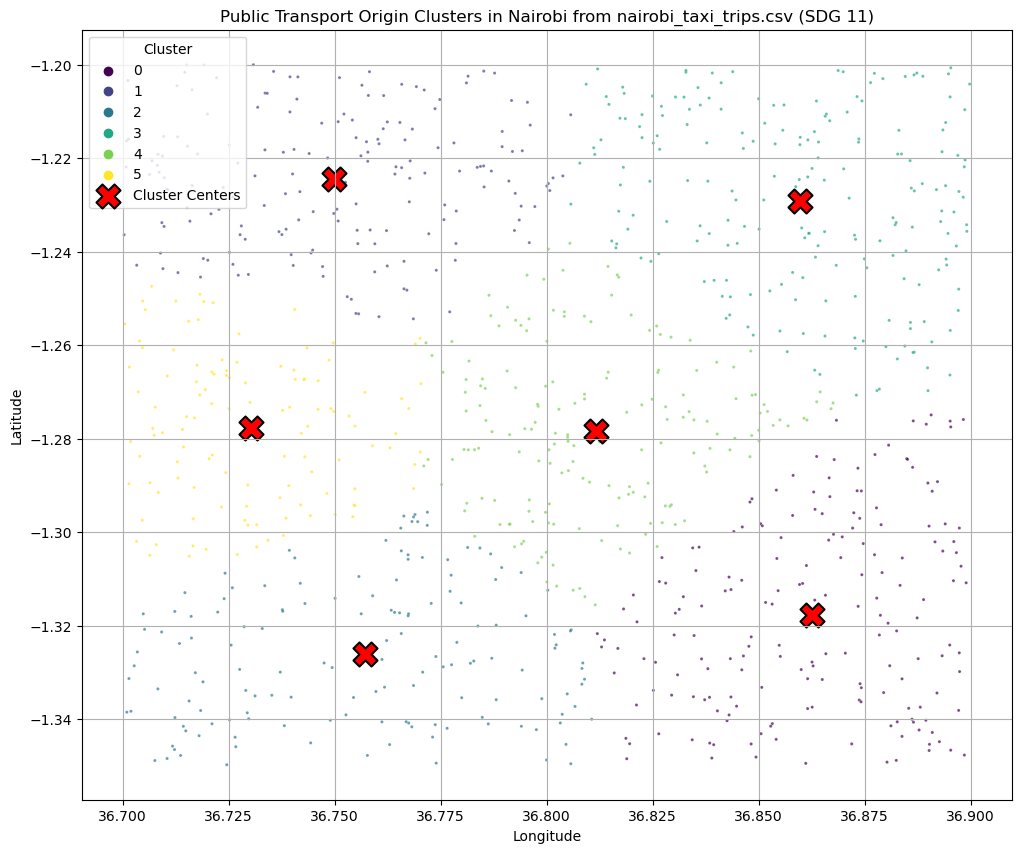


Clustering and visualization complete. The map shows potential public transport pickup hotspots.


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128662 (\N{ONCOMING TAXI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


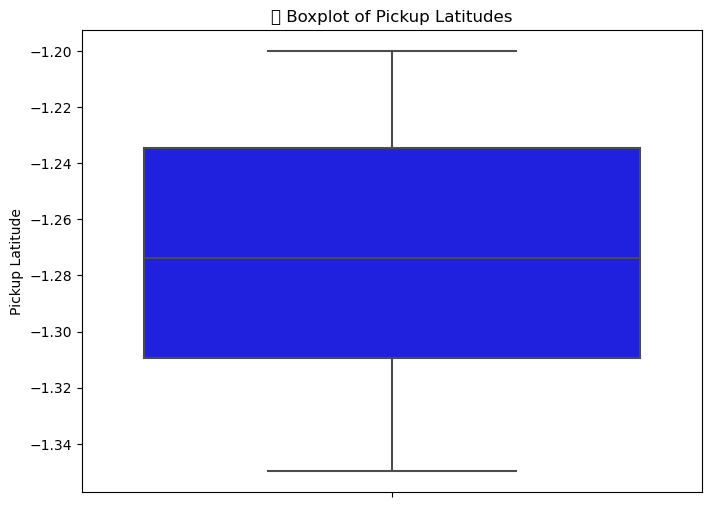

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


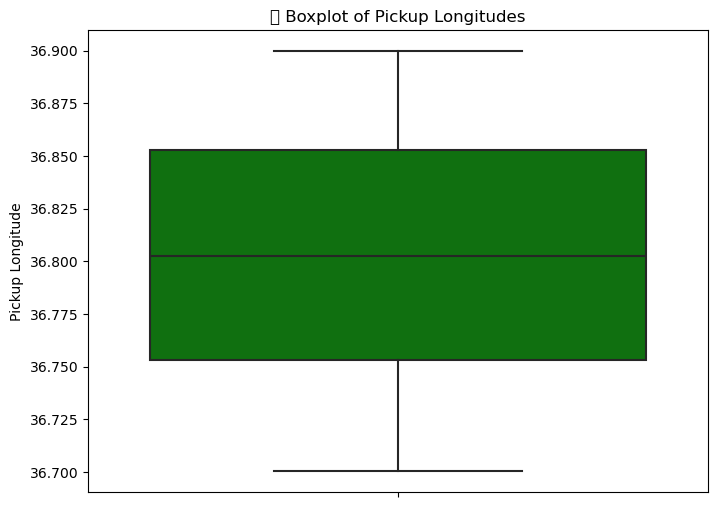

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


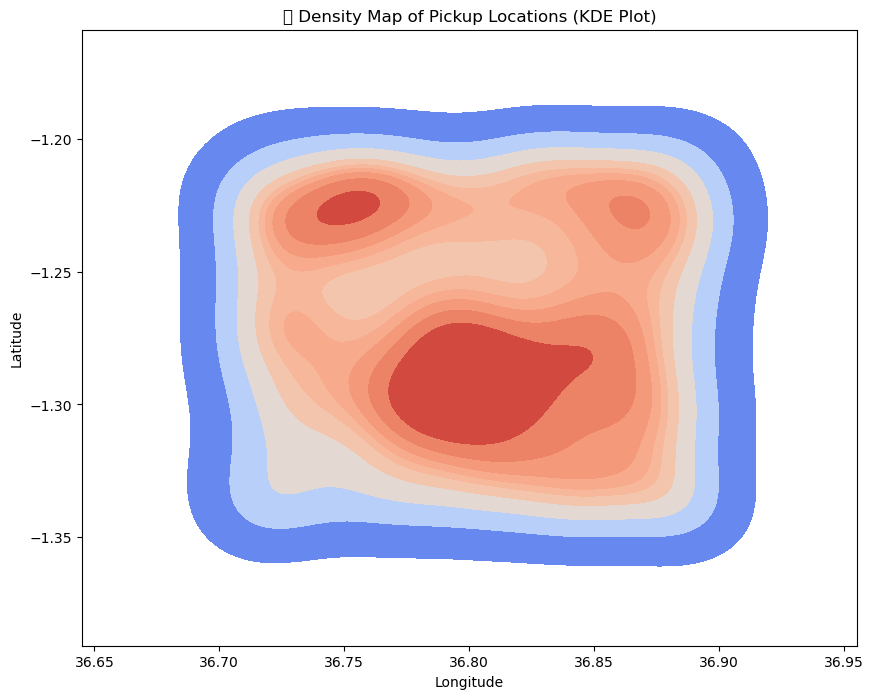

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


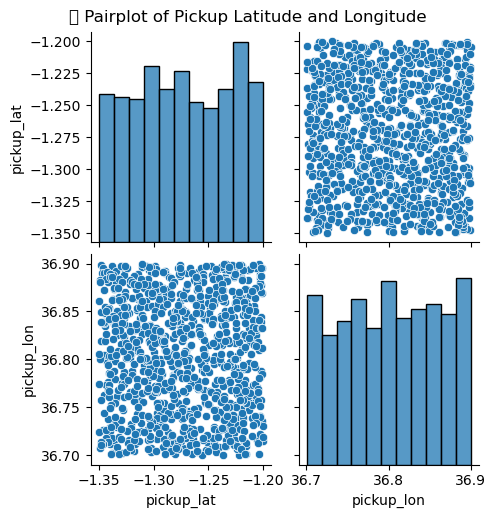

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


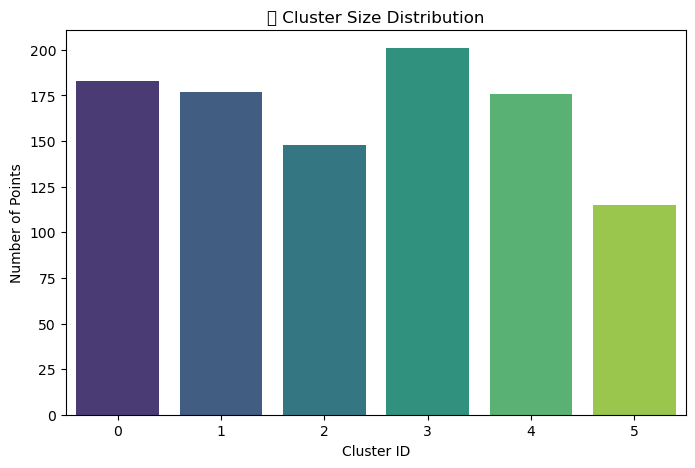

In [2]:

# --- Imports ---
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
# --- Configuration ---
DATASET_FILENAME = 'nairobi_taxi_trips.csv' 
# --- Step 4: Data Collection & Initial Cleaning ---
print(f"--- Step 4: Loading Data from {DATASET_FILENAME} ---")
try:
    # Load the dataset. Assumes it's a CSV with common taxi trip columns.
    data = pd.read_csv(DATASET_FILENAME)
    print(f"Successfully loaded data from '{DATASET_FILENAME}'.")
    print("\nOriginal columns in the dataset:")
    print(data.columns.tolist()) 
    print("\nFirst 5 rows of the loaded dataset:")
    print(data.head())

    # --- Identify Latitude and Longitude Columns for Clustering ---
    lat_column = 'pickup_lat'
    lon_column = 'pickup_lon'

    # Check if the assumed columns exist in the loaded data
    if lat_column not in data.columns or lon_column not in data.columns:
        print(f"\nError: Expected columns '{lat_column}' or '{lon_column}' not found in '{DATASET_FILENAME}'.")
        print("Please inspect your CSV file and update 'lat_column' and 'lon_column' variables in this script.")
        print("\nAvailable columns are:", data.columns.tolist())
        # Exit the script gracefully if critical columns are missing
        exit() 

    # --- Data Cleaning for Clustering ---
    # Select only the relevant latitude and longitude columns for clustering.
    # Using .copy() to ensure we're working on a distinct DataFrame.
    df_for_clustering = data[[lat_column, lon_column]].copy()

    print(f"\nData points before cleaning (NaN, 0,0 filter): {len(df_for_clustering)}")
    
    # Drop rows where Latitude or Longitude values are missing (NaN - Not a Number).
    # This ensures our clustering algorithm only works with complete data points.
    df_for_clustering.dropna(subset=[lat_column, lon_column], inplace=True)
   
    df_for_clustering = df_for_clustering[(df_for_clustering[lat_column] != 0) | (df_for_clustering[lon_column] != 0)]
    
   
    min_lat, max_lat = -1.4, -1.1 
    min_lon, max_lon = 36.6, 37.2
    
    df_for_clustering = df_for_clustering[
        (df_for_clustering[lat_column] >= min_lat) & (df_for_clustering[lat_column] <= max_lat) &
        (df_for_clustering[lon_column] >= min_lon) & (df_for_clustering[lon_column] <= max_lon)
    ]

    print(f"Data points after cleaning and geographical filtering: {len(df_for_clustering)}")
    print("\nFirst 5 rows of cleaned data used for clustering:")
    print(df_for_clustering.head())

except FileNotFoundError:
    print(f"Error: The file '{DATASET_FILENAME}' was not found.")
    print("Please make sure the CSV file is in the same folder as this Python script.")
    exit() # Stop the script if the file isn't found
except Exception as e:
    print(f"An unexpected error occurred during data loading or initial processing: {e}")
    exit() # Stop the script for any other unexpected errors

# --- Step 5: Data Preprocessing - Scaling Features ---
print("\n--- Step 5: Scaling Features ---")
# Create a StandardScaler object.
scaler = StandardScaler()

# 'Fit' the scaler to our data and then 'transform' it.

scaled_features = scaler.fit_transform(df_for_clustering[[lat_column, lon_column]])

print("First 5 rows of scaled features:")
print(scaled_features[:5])

# --- Step 6: Training K-Means Clustering Model ---
print("\n--- Step 6: Training K-Means Clustering Model ---")

# --- Deciding on 'K' (Number of Clusters) ---

num_clusters = 6 # Starting with 8 clusters for Nairobi taxi data, feel free to experiment!

# Create a KMeans model.
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')

# Train the KMeans model using our scaled data.

kmeans.fit(scaled_features) 

# Get the cluster label for each data point and add it back to our DataFrame.

df_for_clustering['Cluster'] = kmeans.labels_

# Get the coordinates of the center of each cluster.

cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers = scaler.inverse_transform(cluster_centers_scaled)

print("\nDataFrame with assigned clusters (first 5 rows):")
print(df_for_clustering.head())

print(f"\nCluster Centers (Ideal Transport Hub Locations) for {num_clusters} clusters (Latitude, Longitude):")
print(cluster_centers)

# --- Step 7: Evaluate & Visualize Results ---
print("\n--- Step 7: Visualizing Clustering Results ---")

# Set the size of our map for better visibility, especially with potentially many points.
plt.figure(figsize=(12, 10))

# Plot all our cleaned data points (taxi pickup locations).

sns.scatterplot(x=lon_column, y=lat_column, hue='Cluster', data=df_for_clustering, palette='viridis', s=5, alpha=0.7)


plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], marker='X', s=300, color='red', label='Cluster Centers', edgecolor='black', linewidth=1.5)

# Add a title and labels to our map for clarity.
plt.title(f'Public Transport Origin Clusters in Nairobi from {DATASET_FILENAME} (SDG 11)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print("\nClustering and visualization complete. The map shows potential public transport pickup hotspots.")
 # Detect Outliers (Boxplots)
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_for_clustering[lat_column], color="blue")
plt.ylabel("Pickup Latitude")
plt.title("🚖 Boxplot of Pickup Latitudes")
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_for_clustering[lon_column], color="green")
plt.ylabel("Pickup Longitude")
plt.title("📍 Boxplot of Pickup Longitudes")
plt.show()

#Identify High-Density Pickup Areas (Heatmap
plt.figure(figsize=(10, 8))
sns.kdeplot(x=df_for_clustering[lon_column], y=df_for_clustering[lat_column], cmap="coolwarm", fill=True)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("🗺️ Density Map of Pickup Locations (KDE Plot)")
plt.show()
#Explore Feature Relationships (Pairplot)
sns.pairplot(df_for_clustering[[lat_column, lon_column]])
plt.suptitle("📊 Pairplot of Pickup Latitude and Longitude", y=1.02) # y adjusts title height
plt.show()
#VISUALIZING CLUSTER DISTRIBUTION
plt.figure(figsize=(8, 5))
sns.countplot(x=df_for_clustering["Cluster"], palette="viridis") # Use df_for_clustering and 'Cluster' column
plt.xlabel("Cluster ID")
plt.ylabel("Number of Points")
plt.title("📊 Cluster Size Distribution")
plt.show()